# Distributed Computing with Dask: Step-by-step Exercise

Mahdi Farnaghi and Mahdi Khodadadzadeh

October 2024


**Objective: Explore distributed computing concepts using Dask for Exploratory Data Analysis (EDA).**

## Dataset

### Description 

In this exercise, we will be using the **Iris dataset**, one of the most well-known datasets in data science. The Iris dataset contains 150 samples from three species of Iris flowers: *Iris setosa*, *Iris virginica*, and *Iris versicolor*. Each sample has four features:

1. **Sepal length** (in cm)
2. **Sepal width** (in cm)
3. **Petal length** (in cm)
4. **Petal width** (in cm)

These features describe the physical characteristics of the flowers, which are used to classify the species. The dataset is widely used for classification tasks and exploratory data analysis (EDA).

---

### Dataset Columns:

- **sepal length**: Length of the sepal (in cm).
- **sepal width**: Width of the sepal (in cm).
- **petal length**: Length of the petal (in cm).
- **petal width**: Width of the petal (in cm).
- **species**: The species of the Iris flower (*Iris setosa*, *Iris virginica*, or *Iris versicolor*).

---

We will use this dataset to explore how Dask can be applied to distributed computing tasks for data analysis.

---

## Installation

In [1]:
# !pip install -q "dask[distributed]" --upgrade 
# !pip install -q dask[dataframe]
# !pip install -q scipy

## Step 1: Setting up the Dask Client

Task: Initialize a Dask Client to enable parallel and distributed computing.

In [2]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 9
Total threads: 72,Total memory: 736.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40057,Workers: 9
Dashboard: http://127.0.0.1:8787/status,Total threads: 72
Started: Just now,Total memory: 736.00 GiB
Comm: tcp://127.0.0.1:41819,Total threads: 8
Dashboard: http://127.0.0.1:36829/status,Memory: 81.78 GiB
Nanny: tcp://127.0.0.1:34379,


## Step 2: Load the dataset using Dask

Task: Load the Iris dataset using `dask.read_csv`.

Instruction: Use Dask's `read_csv` to load the Iris dataset. This is similar to how you use `pandas.read_csv`. Print the first 5 rows of the dataset.

In [3]:
import dask
import dask.dataframe as dd
import os

In [4]:
file = os.path.join('EDA_iris.txt')

df = dd.read_csv(file,
                 sep = ',',
                 names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'], 
                 dtype={'species': 'object'})

print(df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## Step 3: Set the Index

Task: Set the species as the index for the dataframe.

Instruction: Change the index of the dataframe to 'species' and check how the dataset looks after the change.

In [5]:
ddf = df.set_index('species')

ddf

,sepal_length,sepal_width,petal_length,petal_width
npartitions=1,,,,
Iris-setosa,float64,float64,float64,float64
Iris-virginica,...,...,...,...


## Step 6: Getting Data Information

Task: Retrieve information about the dataframe's columns and types.

Instruction: Use .info() to explore the dataframe's structure.

In [6]:
ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 4 entries, sepal_length to petal_width
dtypes: float64(4)

Task: Compute descriptive statistics for the dataset.

Instruction: Use .describe() to calculate statistics for each column and ensure that you trigger computation with .compute().

In [7]:
stat = ddf.describe().compute()

print(stat)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Step 4: Slicing the Dataset

Task: Perform slicing on the dataframe to select specific rows.

Instruction: Select a few rows from the dataframe and compute them using Dask's parallel computation.

In [12]:
#normal slicing
selected_rows = ddf.loc['Iris-setosa'].compute()

selected_rows.head()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2


In [31]:
#create chunk
dask_array = ddf.to_dask_array (lengths = True)
dask_array = dask_array.rechunk(50,50,50)

dask_array
#dask_array.compute()

dask.array<rechunk-merge, shape=(150, 4), dtype=float64, chunksize=(50, 4), chunktype=numpy.ndarray>

In [50]:
#visualization of DAG 
r = dask_array.mean (axis=0)
r

dask.array<mean_agg-aggregate, shape=(4,), dtype=float64, chunksize=(4,), chunktype=numpy.ndarray>

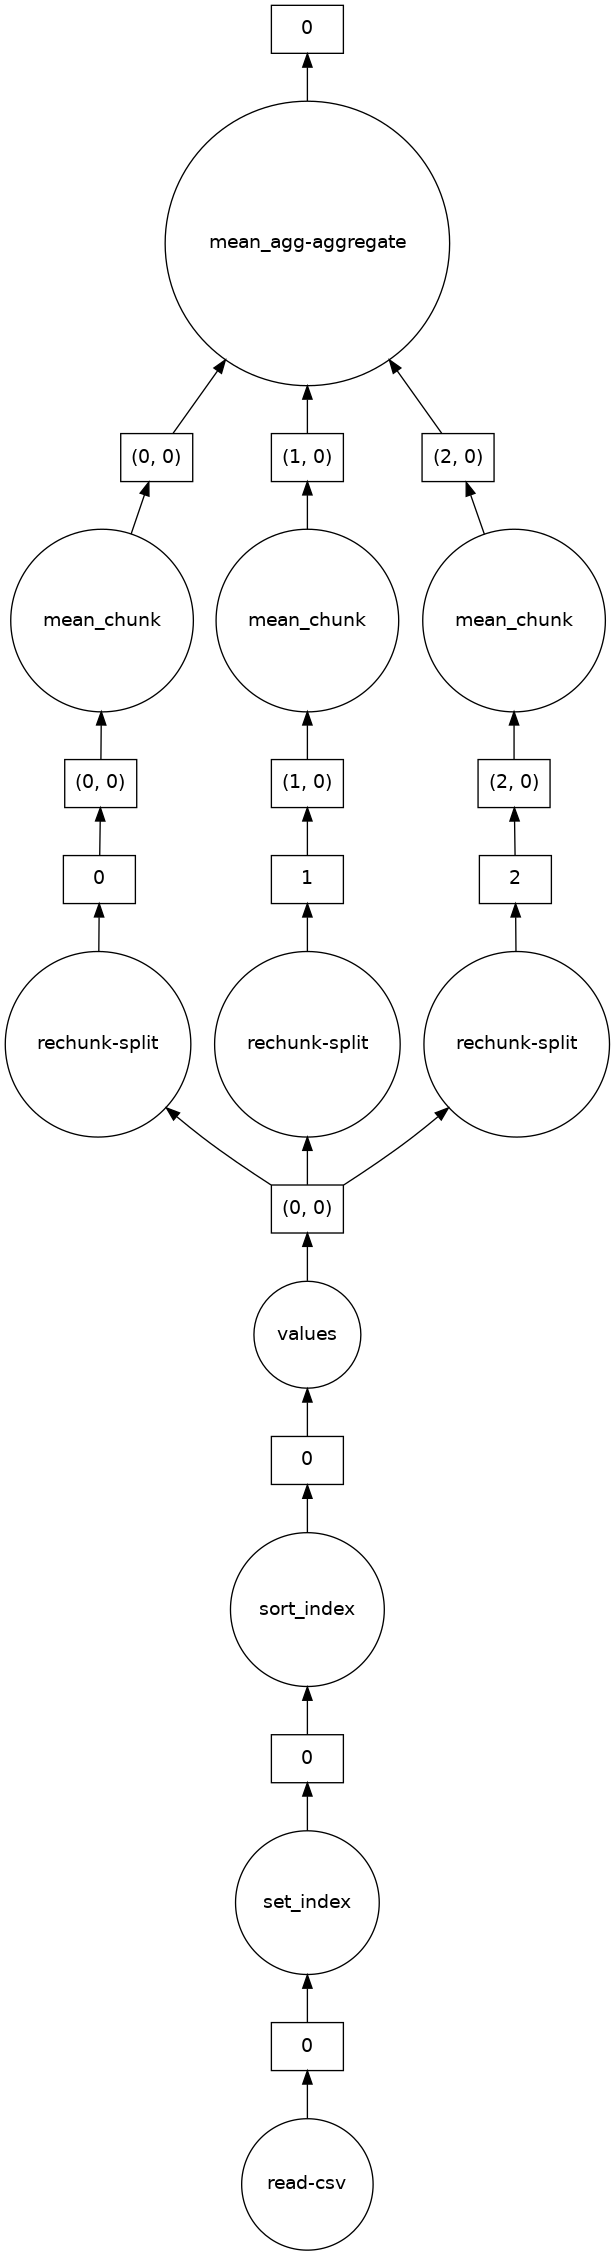

In [34]:
r.visualize()

## Step 5: Mean, Quantiles, and Variance

Task: Compute the mean, quantiles, and variance of the dataset.

Instruction: Calculate the mean, quantiles, and variance of the dataset.

In [35]:
ddf.describe().compute()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
variance = ddf.var().compute()
variance

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

## Step 6: Data Visualization

Task: Visualize the distribution of columns using histograms and density plots.

Instruction: Plot the histogram and kernel density estimate (KDE) for the 'sepal length' column.

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

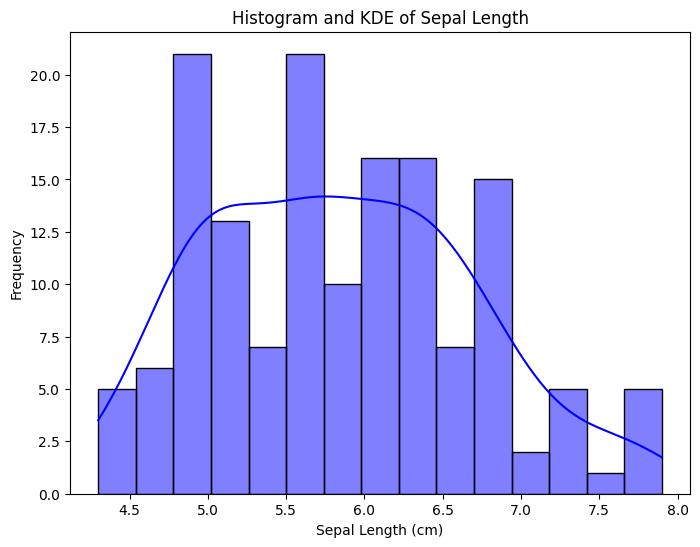

In [38]:
sepal_length = ddf['sepal_length'].compute()

## plot histogram using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(sepal_length, kde=True, bins=15, color='blue')

# Add labels and title
plt.title('Histogram and KDE of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()



## Step 7: Pie and Bar Charts

Task: Create a pie chart and bar chart based on species count.

Instruction: Visualize the species distribution using a pie chart and a bar chart.

In [39]:
species_counts = ddf.index.value_counts().compute()

species_counts

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

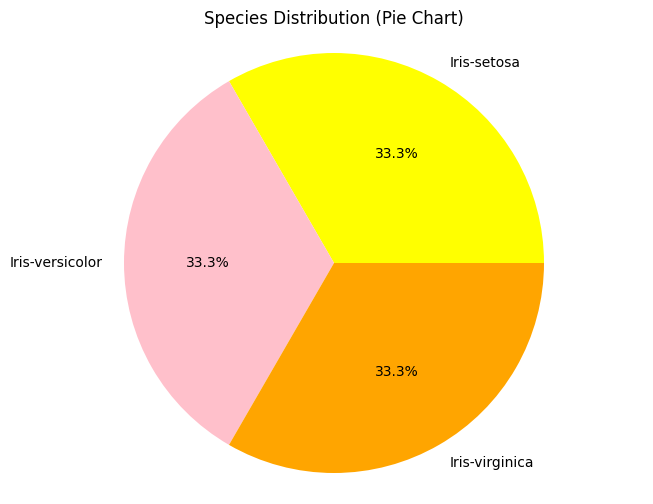

In [40]:
# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=0, colors = ['yellow', 'pink', 'orange'])
plt.title('Species Distribution (Pie Chart)')
plt.axis('equal')  # ensures the pie chart is circular
plt.show()

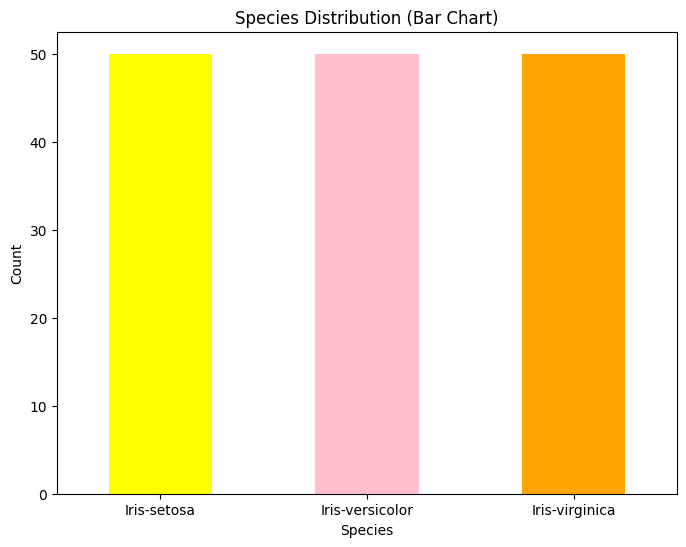

In [41]:
# Bar chart
plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar', color=['yellow', 'pink', 'orange'])
plt.title('Species Distribution (Bar Chart)')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep the x labels horizontal
plt.show()

## Step 8: Covariance and Correlation

Task: Compute the covariance and correlation of the dataset.

Instruction: Calculate and display the covariance and correlation between columns.

In [42]:
covariance = ddf.cov().compute()

covariance

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [43]:
correlation = ddf.corr().compute()

correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## Step 8: Boxplot and Scatterplot

Task: Create a boxplot and scatterplot of the dataset.

Instruction: Generate a boxplot and scatterplot to explore the data distribution.

In [44]:
ddf_computed = ddf.compute()

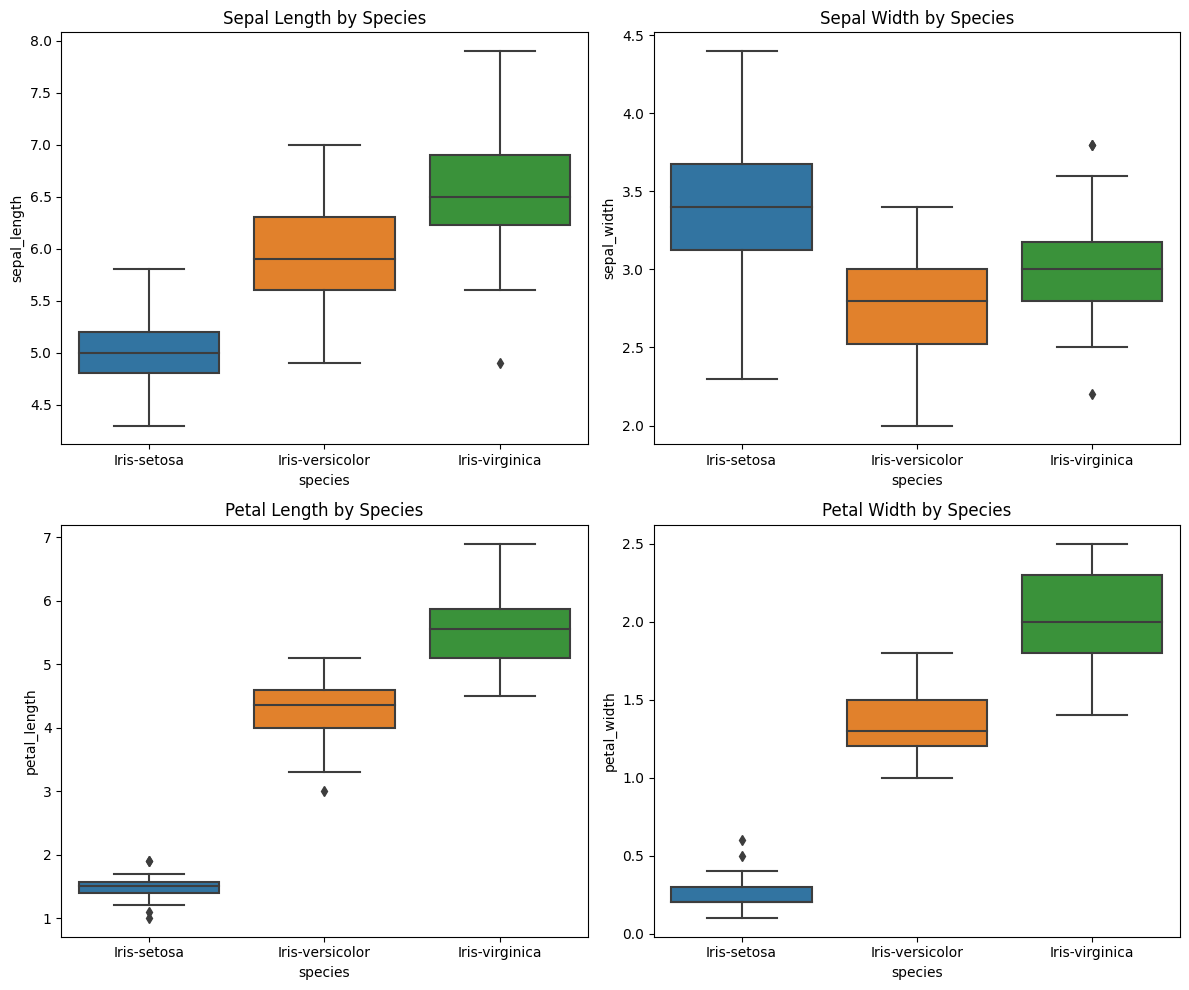

In [45]:
# Create a 2x2 grid for Boxplots (by species)
plt.figure(figsize=(12, 10))

# Boxplot for sepal_length
plt.subplot(2, 2, 1)
sns.boxplot(x=ddf_computed.index, y='sepal_length', data=ddf_computed)
plt.title('Sepal Length by Species')

# Boxplot for sepal_width
plt.subplot(2, 2, 2)
sns.boxplot(x=ddf_computed.index, y='sepal_width', data=ddf_computed)
plt.title('Sepal Width by Species')

# Boxplot for petal_length
plt.subplot(2, 2, 3)
sns.boxplot(x=ddf_computed.index, y='petal_length', data=ddf_computed)
plt.title('Petal Length by Species')

# Boxplot for petal_width
plt.subplot(2, 2, 4)
sns.boxplot(x=ddf_computed.index, y='petal_width', data=ddf_computed)
plt.title('Petal Width by Species')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

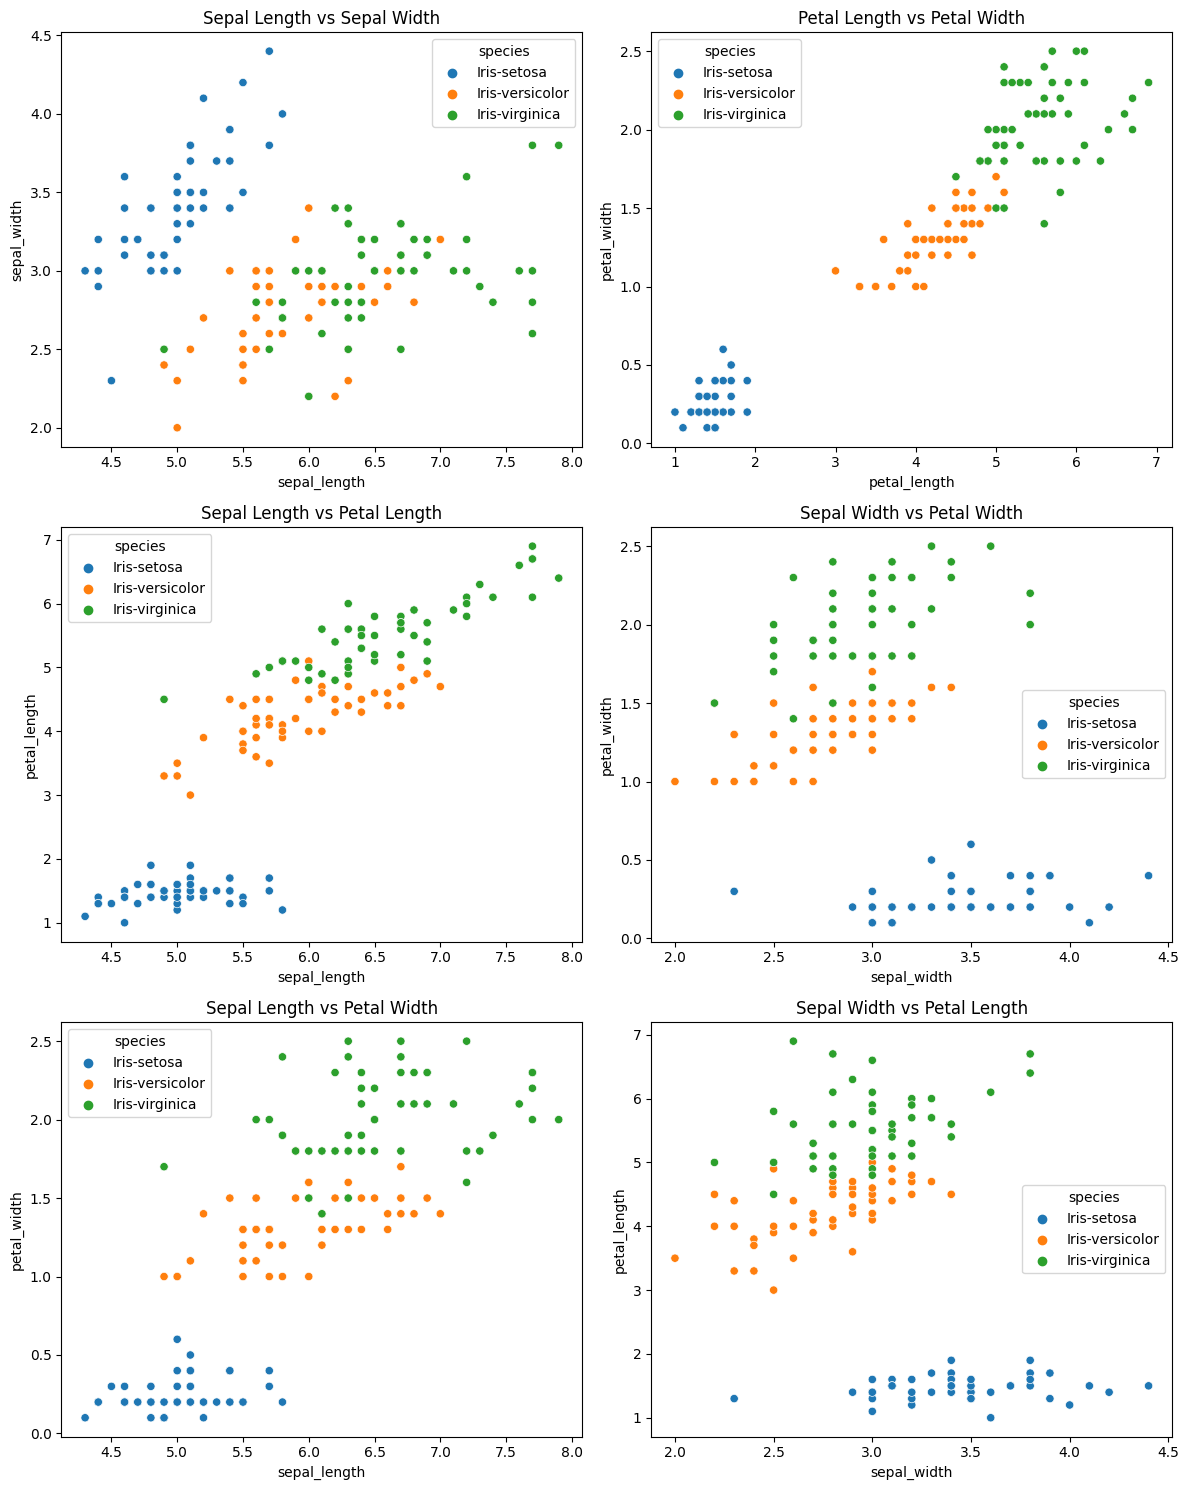

In [46]:
# Create a 3x2 grid for Scatterplots
plt.figure(figsize=(12, 15))

# Scatterplot between sepal_length and sepal_width
plt.subplot(3, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=ddf_computed)
plt.title('Sepal Length vs Sepal Width')

# Scatterplot between petal_length and petal_width
plt.subplot(3, 2, 2)
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=ddf_computed)
plt.title('Petal Length vs Petal Width')

# Scatterplot between sepal_length and petal_length
plt.subplot(3, 2, 3)
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=ddf_computed)
plt.title('Sepal Length vs Petal Length')

# Scatterplot between sepal_width and petal_width
plt.subplot(3, 2, 4)
sns.scatterplot(x='sepal_width', y='petal_width', hue='species', data=ddf_computed)
plt.title('Sepal Width vs Petal Width')

# Scatterplot between sepal_length and petal_width
plt.subplot(3, 2, 5)
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', data=ddf_computed)
plt.title('Sepal Length vs Petal Width')

# Scatterplot between sepal_width and petal_length
plt.subplot(3, 2, 6)
sns.scatterplot(x='sepal_width', y='petal_length', hue='species', data=ddf_computed)
plt.title('Sepal Width vs Petal Length')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Step 9: Advanced Plots (3D and Hexbin)

Task: Create advanced visualizations such as a 3D plot and hexbin plot.

Instruction: Create a 3D scatter plot and a hexbin plot to visualize the relationship between petal length and width.

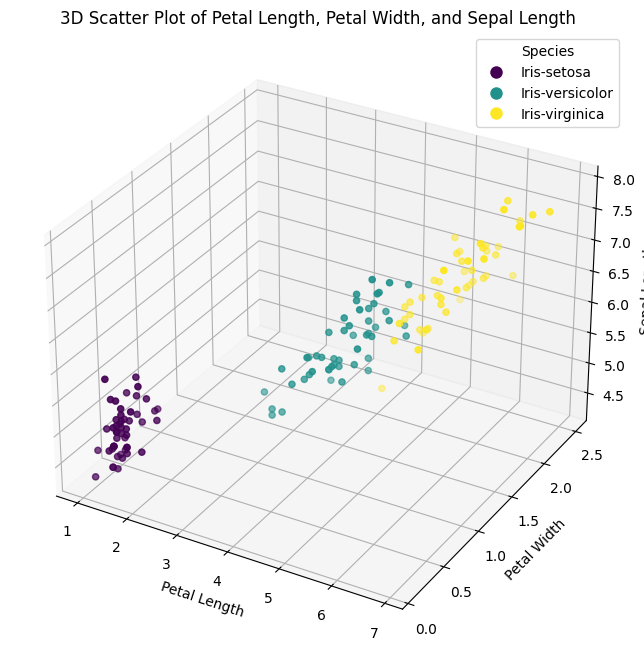

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

species = pd.Categorical(ddf_computed.index)
species_names = species.categories

## 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(ddf_computed['petal_length'], ddf_computed['petal_width'], ddf_computed['sepal_length'], 
                     c=species.codes, cmap='viridis')

# Label axes
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
plt.title('3D Scatter Plot of Petal Length, Petal Width, and Sepal Length')

# Add legend
legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) 
                  for i in range(len(species_names))]
ax.legend(legend, species_names, title="Species")


plt.show()

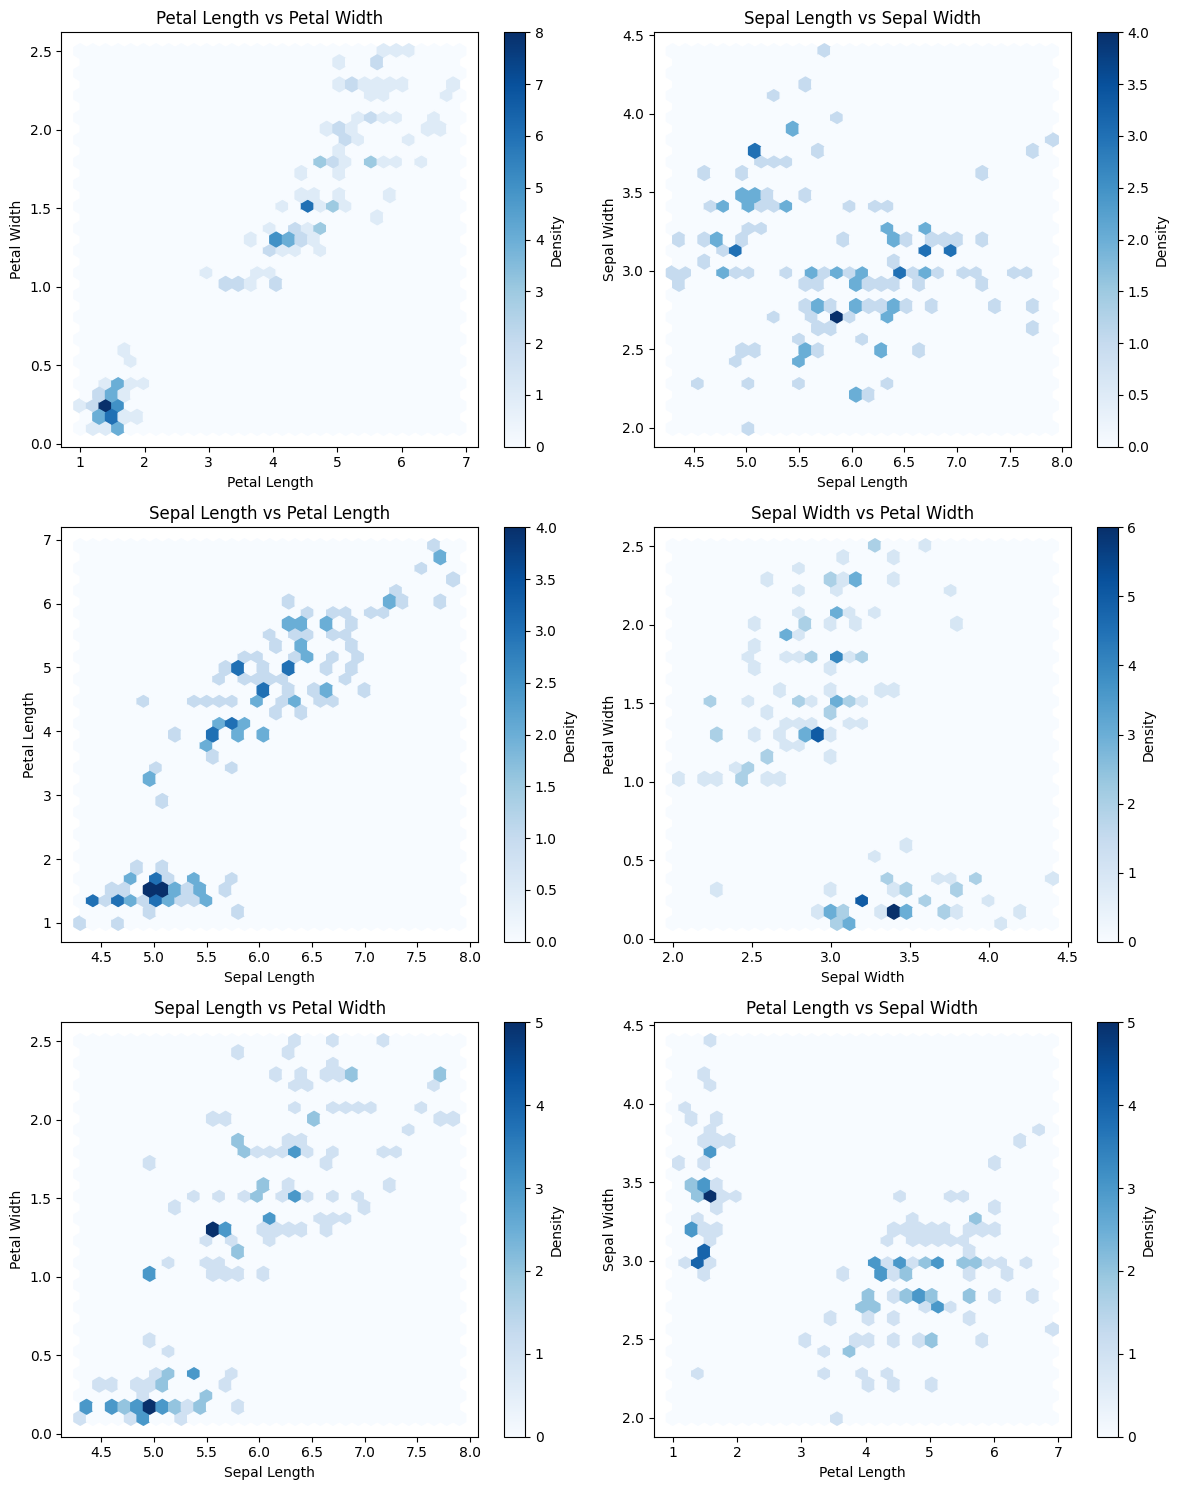

In [48]:
## Create a 3x2 grid Hexbin Plot
plt.figure(figsize=(12, 15))

# Hexbin plot for petal_length and petal_width
plt.subplot(3, 2, 1)
plt.hexbin(ddf_computed['petal_length'], ddf_computed['petal_width'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')

# Hexbin plot for sepal_length and sepal_width
plt.subplot(3, 2, 2)
plt.hexbin(ddf_computed['sepal_length'], ddf_computed['sepal_width'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

# Hexbin plot for sepal_length and petal_length
plt.subplot(3, 2, 3)
plt.hexbin(ddf_computed['sepal_length'], ddf_computed['petal_length'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length')

# Hexbin plot for sepal_width and petal_width
plt.subplot(3, 2, 4)
plt.hexbin(ddf_computed['sepal_width'], ddf_computed['petal_width'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Sepal Width vs Petal Width')

# Hexbin plot for sepal_length and petal_width
plt.subplot(3, 2, 5)
plt.hexbin(ddf_computed['sepal_length'], ddf_computed['petal_width'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.title('Sepal Length vs Petal Width')

# Hexbin plot for petal_length and sepal_width
plt.subplot(3, 2, 6)
plt.hexbin(ddf_computed['petal_length'], ddf_computed['sepal_width'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('Petal Length vs Sepal Width')

plt.tight_layout()
plt.show()

## Final Step: Closing the Dask Client

Task: Properly close the Dask Client when done.

Instruction: Always remember to close the Dask Client when you're finished with the tasks.

In [49]:
client.shutdown()